# Study of markers in normal and pathological breast tissues

data from reed 2024 nature 

In [2]:
import scSherlock as sh
import scanpy as sc

/home/croizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
adata = sc.read_h5ad('/home/croizer/Downloads/HBCA_reed_2024.h5ad')
adata.var_names = adata.var['feature_name'] # set feature name instead of ensemble id
cell_type_column = "author_cell_type"
patient_column = "donor_id"


In [6]:
adata.obs

,mapped_reference_assembly,mapped_reference_annotation,alignment_software,donor_id,self_reported_ethnicity_ontology_term_id,donor_living_at_sample_collection,donor_menopausal_status,organism_ontology_term_id,sample_uuid,sample_preservation_method,...,reported_diseases,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
r1_hbca_c01_AACCATGGTATGCTTG,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,<!&Xml@2U3
r1_hbca_c01_ACGGAGACAAGCTGTT,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,!^*casZX*i
r1_hbca_c01_ACTGATGGTCATCGGC,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,tLtNkuoh!2
r1_hbca_c01_AGGTCATGTGCACCAC,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,p{<t;?E>p1
r1_hbca_c01_CAGCCGAAGATATGCA,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,6e?5{$)A$p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hbca_c150_hbca_c150_TTTATGCCACAATGTC-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,pericyte,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,9n<A?*kjwJ
hbca_c150_hbca_c150_TTTCCTCAGGTATTGA-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,vascular associated smooth muscle cell,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,_pa>;Lk*+Q
hbca_c150_hbca_c150_TTTGATCGTGTTACAC-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,pericyte,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,9e7S$O8Qm)
hbca_c150_hbca_c150_TTTGATCTCGAGAGAC-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,vascular associated smooth muscle cell,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,ESyjcHR5cG


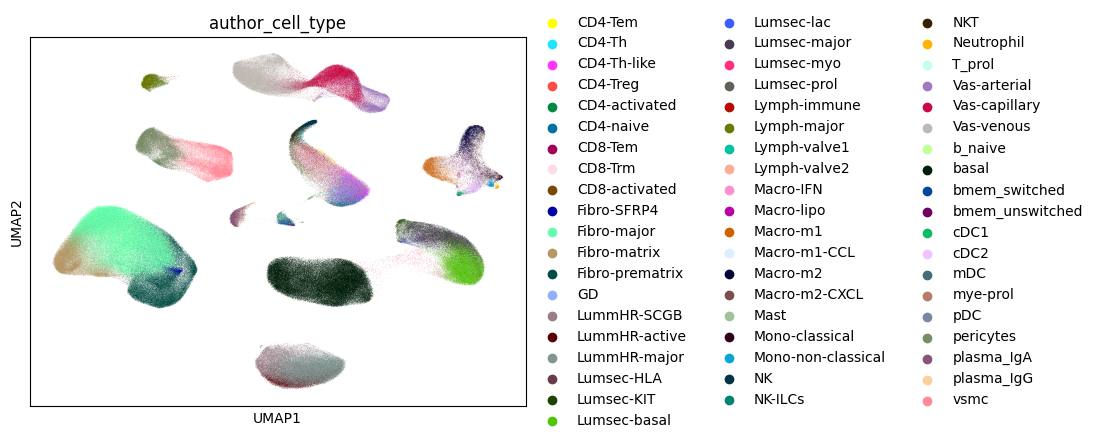

In [7]:
sc.pl.umap(adata, color="author_cell_type")

In [8]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=20,
    n_jobs=20
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)



2025-03-24 16:32:17,113 - ScSherlock - INFO - Pre-filtering genes...
2025-03-24 16:32:17,115 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (714331, 33145) data matrix


In [17]:
# Run the algorithm
top_markers = scherlock.run(method="theoric")
#top_markers = scherlock.run(method="empiric")


2025-03-24 16:49:26,295 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|██████████| 7308/7308 [00:02<00:00, 2549.99it/s]
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:496: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:504: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (n_cells.drop(ctype).groupby(level=self.column_patient).sum())).median()
/ho

{'LummHR-SCGB':                 1   10            25    aggregated  exp_prop
feature_name                                                
GLRA3         1.0  1.0  1.000000e+00  1.000000e+00  0.000021
ABCC11        1.0  1.0  1.000000e+00  1.000000e+00  0.000009
SCGB1B2P      1.0  1.0  1.000000e+00  1.000000e+00  0.000009
SERPINA6      1.0  1.0  1.000000e+00  1.000000e+00  0.000004
UGT2B11       1.0  1.0  1.000000e+00  1.000000e+00  0.000003
...           ...  ...           ...           ...       ...
CALM1         0.0  0.0 -1.826196e-15 -6.087319e-16  0.000412
HLA-E         0.0  0.0 -2.091650e-15 -6.972167e-16  0.000324
PNRC1         0.0  0.0 -4.057561e-15 -1.352520e-15  0.000308
LGALS1        0.0  0.0 -1.912242e-14 -6.374141e-15  0.000137
VIM           0.0  0.0 -2.936841e-06 -9.789472e-07  0.000129

[33145 rows x 5 columns], 'LummHR-major':                 1   10            25    aggregated  exp_prop
feature_name                                                
MUC4          1.0  1.0  1.

/home/croizer/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:845: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['MIR1302-2HG', 'FAM138A', 'OR4F5', 'ENSG00000238009.6', 'ENSG00000239945.1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


2025-03-24 16:51:40,545 - ScSherlock - INFO - Plotting 58 genes for 58 cell types using theoric model
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7a662d8e6d40>>
Traceback (most recent call last):
  File "/home/croizer/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


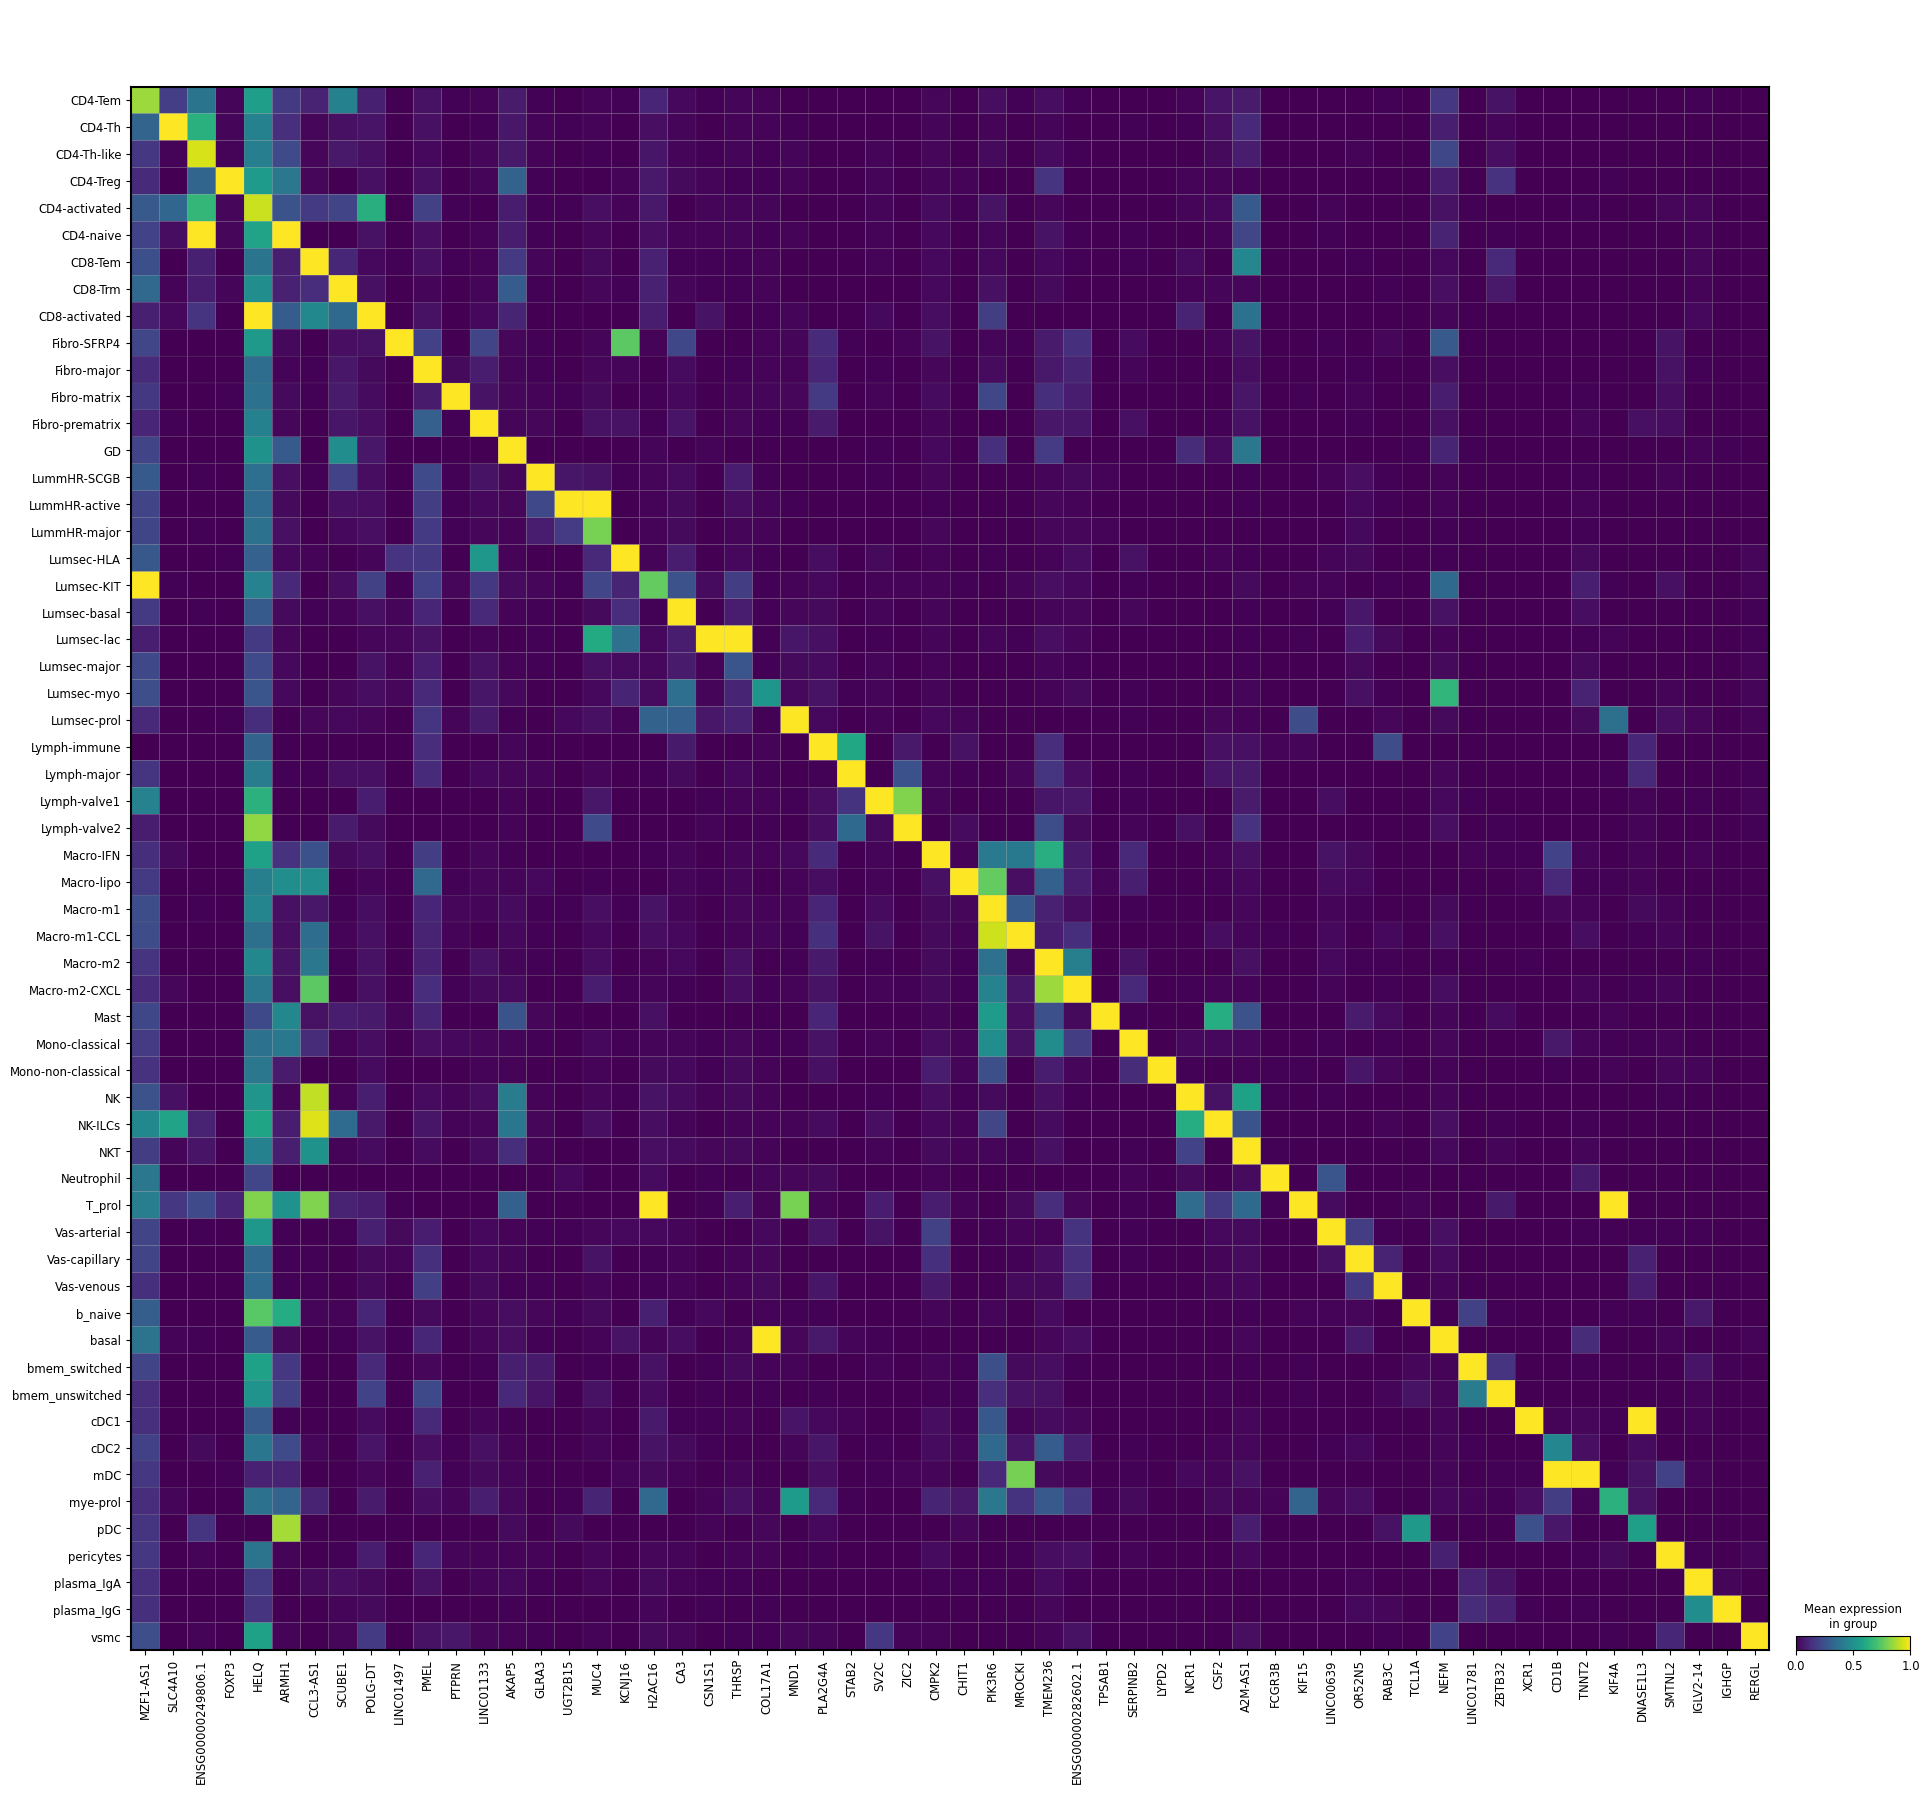

In [18]:
scherlock.plot_marker_heatmap(n_genes=1)

data from kumar 

In [3]:
adata = sc.read_h5ad('/home/croizer/Downloads/kumar_breast_atlas.h5ad')

In [4]:
adata.obs

,sampleID,sample_type_coarse,sample_type,processing_date,dissociation_minutes,parity,brca_status,condition,tissue_condition,reported_ethnicity,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
cellID,,,,,,,,,,,,,,,,,,,,,
CGTCAAAAGACGTCGA-SLX-19902-20449_SIGAA3,SLX-19902-20449_SIGAA3,Stroma enriched,Stroma enriched - unsorted,2020-10-07,7,2,BRCA1,contralateral,Contralateral BRCA1,White-Any_other_background,...,tissue,endothelial cell of lymphatic vessel,10x 3' v3,normal,Homo sapiens,female,breast,European,38-year-old stage,dO*l<a`uXe
CACGGGTAGATTGAGT-SLX-19864_SIGAB5,SLX-19864_SIGAB5,Epithelial enriched - LASP-sorted,Epithelial enriched - LASP-sorted,2020-10-27,10,2,BRCA1,contralateral,Contralateral BRCA1,White-British,...,tissue,luminal adaptive secretory precursor cell of m...,10x 3' v3,normal,Homo sapiens,female,breast,British,36-year-old stage,5GVUQEaaQ&
CTTAGGATCGATCCCT-SLX-19902-20449_SIGAB3,SLX-19902-20449_SIGAB3,Stroma enriched,Stroma enriched - unsorted,2020-10-07,7,2,BRCA1,prophylactic_mastectomy,Mastectomy BRCA1,White-British,...,tissue,fibroblast of mammary gland,10x 3' v3,normal,Homo sapiens,female,breast,British,38-year-old stage,(LG;+3R6<R
TCACTCGCAAATACGA-SLX-20261_SIGAA3,SLX-20261_SIGAA3,Epithelial enriched,Epithelial enriched - unsorted,2021-01-26,10,0,BRCA2,prophylactic_mastectomy,Mastectomy BRCA2,White-British,...,tissue,luminal hormone-sensing cell of mammary gland,10x 3' v3,normal,Homo sapiens,female,breast,British,39-year-old stage,^lSJNe)0v^
TCATGAGAGGGAGTGG-SLX-19902-20449_SIGAA3,SLX-19902-20449_SIGAA3,Stroma enriched,Stroma enriched - unsorted,2020-10-07,7,2,BRCA1,contralateral,Contralateral BRCA1,White-Any_other_background,...,tissue,blood vessel endothelial cell,10x 3' v3,normal,Homo sapiens,female,breast,European,38-year-old stage,q3L|MZ?}|L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAGATGGAGCGGACAT-SLX-20005-20446_SIGAB6,SLX-20005-20446_SIGAB6,Stroma enriched,Stroma enriched - unsorted,2020-12-02,5,2,WT,prophylactic_mastectomy,Mastectomy WT,White-British,...,tissue,luminal hormone-sensing cell of mammary gland,10x 3' v3,normal,Homo sapiens,female,breast,British,30-year-old stage,GuerV-c#A$
AGGACGAAGTAAAGCT-SLX-20870_SIGAA9,SLX-20870_SIGAA9,Stroma enriched,Stroma enriched - unsorted,2021-06-02,7,0,BRCA1,prophylactic_mastectomy,Mastectomy BRCA1,NaN,...,tissue,perivascular cell,10x 3' v3,normal,Homo sapiens,female,breast,unknown,31-year-old stage,^fF%D+Uk%L
CTGAATGTCGCTACGG-SLX-20005_SIGAH12,SLX-20005_SIGAH12,Epithelial enriched - LASP-sorted,Epithelial enriched - LASP-sorted,2020-11-12,10,unknown,assume_WT,reduction_mammoplasty,Mammoplasty WT,Black_or_Black_British-Any_other_Black_background,...,tissue,luminal adaptive secretory precursor cell of m...,10x 3' v3,normal,Homo sapiens,female,breast,African,33-year-old stage,F;X^-bX{>*


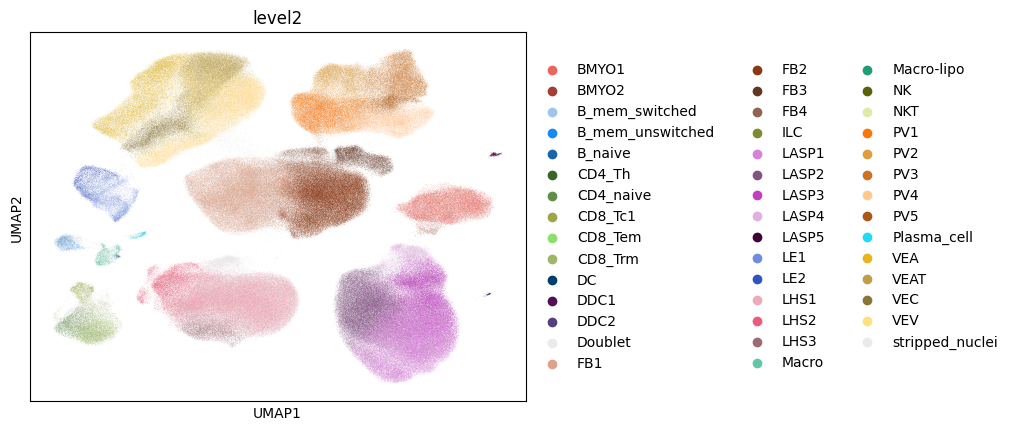

In [14]:
sc.pl.umap(adata, color="level2")

/home/croizer/.local/lib/python3.10/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 34455 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


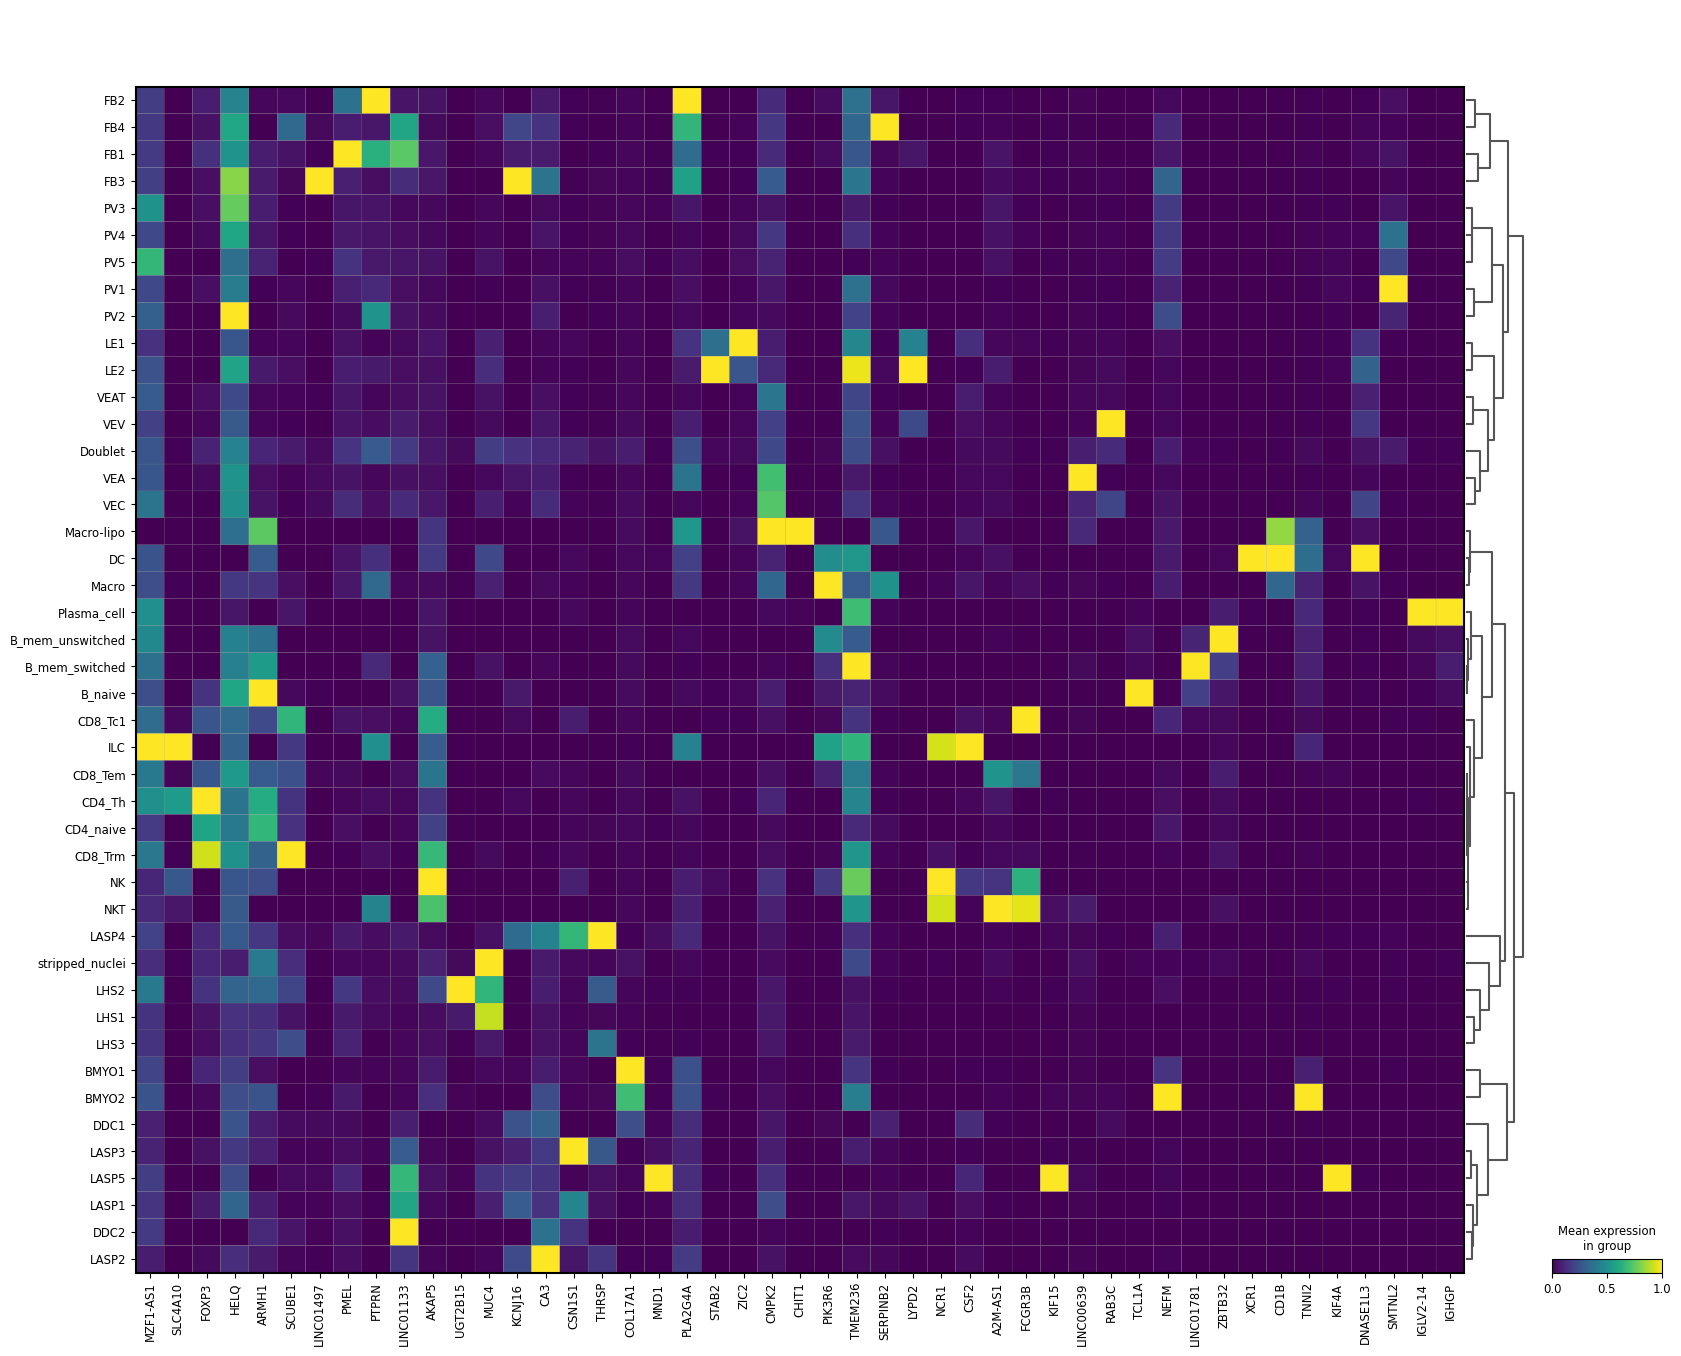

In [18]:
adata.var_names = adata.var['gene_name']
markers = [
    "MZF1-AS1", "SLC4A10", "ENSG00000249806.1", "FOXP3", "HELQ", "ARMH1", "CCL3-AS1", "SCUBE1",
    "POLG-DT", "LINC01497", "PMEL", "PTPRN", "LINC01133", "AKAP5", "UGT2B15", "MUC4", "KCNJ16",
    "H2AC16", "CA3", "CSN1S1", "THRSP", "COL17A1", "MND1", "PLA2G4A", "STAB2", "SY2C", "ZIC2",
    "CMPK2", "CHIT1", "PIK3R6", "MROCK1", "TMEM236", "ENSG00000282602.1", "SERPINB2", "LYPD2",
    "NCR1", "CSF2", "A2M-AS1", "FCGR3B", "KIF15", "LINC00639", "RAB3C", "TCL1A", "NEFM",
    "LINC01781", "ZBTB32", "XCR1", "CD1B", "TNNI2", "KIF4A", "DNASE1L3", "SMTNL2", "IGLV2-14",
    "IGHGP", "REFGL"
]
present_markers = [gene for gene in markers if gene in adata.var_names]
sc.pl.matrixplot(adata, present_markers, groupby="level2", use_raw=False, standard_scale='var', dendrogram=True)

In [ ]:
scsherlock